# Install Library

In [1]:
###Install library yang dibutuhkan
# !pip install tweepy     #untuk crawling data twitter 
# !pip install wordcloud  #visualisasi kata
# !pip install nltk       #Library ubtuk tokenizing
# !pip install Sastrawi   #Library untuk stemming, filtering teks Bahasa Indonesia
# !pip install sklearn    #pengujian dan klasifikasi
# !pip install conda install -c conda-forge swifter  #library stemming 

In [1]:
#Import Library dataset,preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt

#Import Library preprocessing

import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package punkt to C:\Users\ACER-
[nltk_data]     KL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
#Import library klasifikasi,pengujian,visualiasi

from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn import model_selection

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# Load Dataset

In [35]:
# Load data from a CSV file into pandas DataFrame
data = pd.read_csv("isatcare.csv")
data.head(20)

,username,tweetcreatedts,tweet
0,ruimsae,2021-12-22 23:53:41,@IndosatCare Ngirim dm pun pending min bentar😪😾
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...
3,IndosatCare,2021-12-22 23:48:55,"@ruimsae Hai Kak, maaf banget buat kendalanya...."
4,bukan_dara,2021-12-22 23:44:43,@IndosatCare Masih lola
5,IndosatCare,2021-12-22 23:44:21,"@ErikBlack Hai kak Erik, maaf untuk kejadian y..."
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I..."
8,ruimsae,2021-12-22 23:36:29,Sinyal 1 bar doang atau malah ilang plis ga bi...
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...


In [36]:
# drop duplicates/spams tweets
data.drop_duplicates(subset = 'username', keep=False, inplace = True)
data

,username,tweetcreatedts,tweet
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I..."
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...
...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...


In [63]:
data.isnull().sum()

username          0
tweetcreatedts    0
tweet             0
dtype: int64

In [7]:
# # drop duplicates/spams tweets
# data.drop_duplicates(subset = 'tweet', inplace = True)
# data

# Preprocessing Data

In [37]:
#Preprocessing Data
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '',text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r'\b\w{1,2}\b', '', text)  # menghilangkan 2 kata
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
 
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

data['text_clean'] = data['tweet'].apply(cleaningText)
data['text_clean'] = data['text_clean'].apply(casefoldingText)
data.drop_duplicates(subset ='tweet', inplace = True)
data

,username,tweetcreatedts,tweet,text_clean
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...
...,...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min,bantu cek min
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...,sudah sebulan lebih sejak complaint masih belu...
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...,sudah hampir bulan jaringan yang saya dapat ...
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...,indosat ini kenapa lemot banget padahal jaring...


In [38]:
#----------------TOKENIZING using NLTK & frequency distribution--------------
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def word_tokenize_wrapper(text):
    return word_tokenize(text)

# def freqDist_wrapper(text):
#     return FreqDist(text)

data['tokenizing'] = data['text_clean'].apply(word_tokenize_wrapper)
# data['tokenize_fdist'] = data['tokenizing'].apply(freqDist_wrapper)
data
# print('FreqDist dari setiap token : \n') 
# print(data['tokenize_fdist'].head().apply(lambda x : x.most_common()))

,username,tweetcreatedts,tweet,text_clean,tokenizing
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko..."
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar..."
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]"
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ..."
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya..."
...,...,...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min,bantu cek min,"[bantu, cek, min]"
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...,sudah sebulan lebih sejak complaint masih belu...,"[sudah, sebulan, lebih, sejak, complaint, masi..."
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...,sudah hampir bulan jaringan yang saya dapat ...,"[sudah, hampir, bulan, jaringan, yang, saya, d..."
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...,indosat ini kenapa lemot banget padahal jaring...,"[indosat, ini, kenapa, lemot, banget, padahal,..."


In [39]:
#-----------------------FILTERING (Stopword Removing)---------------------

nltk.download('stopwords')  #download stopwords from nltk
import nltk
from nltk.corpus import stopwords

# get stopword 
list_stopwords = nltk.corpus.stopwords.words('indonesian')

# #-----manualy add stopword-------------
# # append additional stopword

list_stopwords.extend(["yg", 'yng', 'dngan', 'bagus', 'cuman', 'cuyy', 'says', 'gini', 'aq', 'akuu', 'gatau', 'km', 'nya', 'kmu', 'sy', 'sya', 'dri', 'dl', 
                  'bngt', 'banget', 'bgt', 'dah' "dg", "rt", "dgn", "ny", "d", 'klo', 'ngga', 'terkait',
                  'kalo', 'amp', 'biar', 'memang', 'emg', 'mending', 'bikin', 'bilang', 'gabisa', 'bgtu', 'hrus', 'hrs', 'haii', 'hello','helloo'
                  'gak', 'ga', 'nggak', 'krn', 'gak', 'edu', 'esim', 'myim', 'yellow', 'nya', 'gb', 'nih', 'yuk'])

# # ---- add stopword from txt file --------------
# # read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# # convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# # convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def remove_stopwords(words):
    words = [word for word in words if word not in list_stopwords]
    return words
data['filtering'] = data['tokenizing'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to C:\Users\ACER-
[nltk_data]     KL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,username,tweetcreatedts,tweet,text_clean,tokenizing,filtering
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko...","[transfer, pulsa, nomor, kirim, kode, pulsanya..."
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar...","[tolong, internet, indosat, tibatiba, lemot, b..."
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]",[sabar]
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ...","[pemegang, saham, terbesar, indosat, multi, me..."
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya...","[kuota, sinyalnya, lemot]"
13,nannenta_,2021-12-22 23:12:11,@IndosatCare drkmrn sinyalnya cuman 1 bar gini...,drkmrn sinyalnya cuman bar gini bener aja dong,"[drkmrn, sinyalnya, cuman, bar, gini, bener, a...","[drkmrn, sinyalnya, bener]"
16,ferharie,2021-12-22 23:09:08,Halo @IndosatCare tolong cek dm sy ya.. trims,halo tolong cek trims,"[halo, tolong, cek, trims]","[tolong, trims]"
18,ErikBlack,2021-12-22 22:56:40,Halo @IndosatCare saya baru terdaftar otomati...,halo saya baru terdaftar otomatis paket yell...,"[halo, saya, baru, terdaftar, otomatis, paket,...","[terdaftar, otomatis, paket, menit, dikenakan,..."
22,Denisrmdhn,2021-12-22 22:39:02,@IndosatCare jaringan sayaa dari semalem 3G..k...,jaringan sayaa dari semalem kenapaa yaa adaa g...,"[jaringan, sayaa, dari, semalem, kenapaa, yaa,...","[jaringan, sayaa, semalem, kenapaa, adaa, gang..."
24,styabd,2021-12-22 21:19:32,Halo @IndosatCare saya beli paket Yellow 2 GB ...,halo saya beli paket yellow kok yang terko...,"[halo, saya, beli, paket, yellow, kok, yang, t...","[beli, paket, terkonfirmasi, sisanya, kemana]"


In [40]:
# # import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# # create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# # stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['filtering']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
# print(len(term_dict))
# print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
#     print(term,":" ,term_dict[term])

# # apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['stemming'] = data['filtering'].swifter.apply(get_stemmed_term)
# print(data['stemming_text'])
data

Pandas Apply:   0%|          | 0/805 [00:00<?, ?it/s]

,username,tweetcreatedts,tweet,text_clean,tokenizing,filtering,stemming
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko...","[transfer, pulsa, nomor, kirim, kode, pulsanya...","[transfer, pulsa, nomor, kirim, kode, pulsa, b..."
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar...","[tolong, internet, indosat, tibatiba, lemot, b...","[tolong, internet, indosat, tibatiba, lot, ben..."
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]",[sabar],[sabar]
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ...","[pemegang, saham, terbesar, indosat, multi, me...","[pegang, saham, besar, indosat, multi, media, ..."
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya...","[kuota, sinyalnya, lemot]","[kuota, sinyal, lot]"
...,...,...,...,...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min,bantu cek min,"[bantu, cek, min]",[bantu],[bantu]
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...,sudah sebulan lebih sejak complaint masih belu...,"[sudah, sebulan, lebih, sejak, complaint, masi...","[sebulan, complaint]","[bulan, complaint]"
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...,sudah hampir bulan jaringan yang saya dapat ...,"[sudah, hampir, bulan, jaringan, yang, saya, d...","[jaringan, kunjung, membaiksudah, komplain, cont]","[jaring, kunjung, membaiksudah, komplain, cont]"
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...,indosat ini kenapa lemot banget padahal jaring...,"[indosat, ini, kenapa, lemot, banget, padahal,...","[indosat, lemot, jaringan, kuota, plisss, nyam...","[indosat, lot, jaring, kuota, plisss, nyaman, ..."


In [41]:
#Ubah array to string
filtering = data['filtering'] 

def fit_stopwords(words):
    words = np.array(words)
    words = ' '.join(words)
#     text = text.tostring()
#     text = str(text)
    return words
    
data['tweet_clean'] = data['filtering'].apply(lambda x: fit_stopwords(x))
data.head(10)

,username,tweetcreatedts,tweet,text_clean,tokenizing,filtering,stemming,tweet_clean
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko...","[transfer, pulsa, nomor, kirim, kode, pulsanya...","[transfer, pulsa, nomor, kirim, kode, pulsa, b...",transfer pulsa nomor kirim kode pulsanya dibantu
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar...","[tolong, internet, indosat, tibatiba, lemot, b...","[tolong, internet, indosat, tibatiba, lot, ben...",tolong internet indosat tibatiba lemot benerbe...
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]",[sabar],[sabar],sabar
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ...","[pemegang, saham, terbesar, indosat, multi, me...","[pegang, saham, besar, indosat, multi, media, ...",pemegang saham terbesar indosat multi media be...
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya...","[kuota, sinyalnya, lemot]","[kuota, sinyal, lot]",kuota sinyalnya lemot
13,nannenta_,2021-12-22 23:12:11,@IndosatCare drkmrn sinyalnya cuman 1 bar gini...,drkmrn sinyalnya cuman bar gini bener aja dong,"[drkmrn, sinyalnya, cuman, bar, gini, bener, a...","[drkmrn, sinyalnya, bener]","[drkmrn, sinyal, bener]",drkmrn sinyalnya bener
16,ferharie,2021-12-22 23:09:08,Halo @IndosatCare tolong cek dm sy ya.. trims,halo tolong cek trims,"[halo, tolong, cek, trims]","[tolong, trims]","[tolong, trims]",tolong trims
18,ErikBlack,2021-12-22 22:56:40,Halo @IndosatCare saya baru terdaftar otomati...,halo saya baru terdaftar otomatis paket yell...,"[halo, saya, baru, terdaftar, otomatis, paket,...","[terdaftar, otomatis, paket, menit, dikenakan,...","[daftar, otomatis, paket, menit, kena, tarif]",terdaftar otomatis paket menit dikenakan tarif
22,Denisrmdhn,2021-12-22 22:39:02,@IndosatCare jaringan sayaa dari semalem 3G..k...,jaringan sayaa dari semalem kenapaa yaa adaa g...,"[jaringan, sayaa, dari, semalem, kenapaa, yaa,...","[jaringan, sayaa, semalem, kenapaa, adaa, gang...","[jaring, sayaa, semalem, kenapaa, adaa, ganggu...",jaringan sayaa semalem kenapaa adaa gangguan i...
24,styabd,2021-12-22 21:19:32,Halo @IndosatCare saya beli paket Yellow 2 GB ...,halo saya beli paket yellow kok yang terko...,"[halo, saya, beli, paket, yellow, kok, yang, t...","[beli, paket, terkonfirmasi, sisanya, kemana]","[beli, paket, konfirmasi, sisa, mana]",beli paket terkonfirmasi sisanya kemana


In [17]:
print (data['tweet_clean'])

1        transfer pulsa nomor kirim kode pulsanya dibantu
2       tolong internet indosat tibatiba lemot benerbe...
6                                                   sabar
7       pemegang saham terbesar indosat multi media be...
9                                   kuota sinyalnya lemot
                              ...                        
2743                                                bantu
2744                                    sebulan complaint
2746          jaringan kunjung membaiksudah komplain cont
2748    indosat lemot jaringan kuota plisss nyaman cap...
2755                    gangguan sii ldr bingung gangguan
Name: tweet_clean, Length: 805, dtype: object


In [13]:
# # Export to csv file
data.to_csv('indosat_preprocessing.csv')

In [14]:
# # drop duplicates/spams tweets
# data.drop_duplicates(subset = 'text_clean', inplace = True)
# data

# Labeling Data

In [42]:
#------------------------LABELING DATA----------------------------
#LABELING DATA
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negatif.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 2):
        polarity = 'Positif'

    else:
        polarity = 'Negatif'
    return score, polarity

In [43]:
# Pelabelan sentiment (Kamus Lexicon Bahasa Indonesia)

results = data['filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['labeling'] = results[1]

print(data['labeling'].value_counts())
data

Negatif    729
Positif     76
Name: labeling, dtype: int64


,username,tweetcreatedts,tweet,text_clean,tokenizing,filtering,stemming,tweet_clean,polarity_score,labeling
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko...","[transfer, pulsa, nomor, kirim, kode, pulsanya...","[transfer, pulsa, nomor, kirim, kode, pulsa, b...",transfer pulsa nomor kirim kode pulsanya dibantu,-2,Negatif
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar...","[tolong, internet, indosat, tibatiba, lemot, b...","[tolong, internet, indosat, tibatiba, lot, ben...",tolong internet indosat tibatiba lemot benerbe...,-7,Negatif
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]",[sabar],[sabar],sabar,5,Positif
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ...","[pemegang, saham, terbesar, indosat, multi, me...","[pegang, saham, besar, indosat, multi, media, ...",pemegang saham terbesar indosat multi media be...,1,Negatif
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya...","[kuota, sinyalnya, lemot]","[kuota, sinyal, lot]",kuota sinyalnya lemot,-7,Negatif
...,...,...,...,...,...,...,...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min,bantu cek min,"[bantu, cek, min]",[bantu],[bantu],bantu,-1,Negatif
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...,sudah sebulan lebih sejak complaint masih belu...,"[sudah, sebulan, lebih, sejak, complaint, masi...","[sebulan, complaint]","[bulan, complaint]",sebulan complaint,0,Negatif
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...,sudah hampir bulan jaringan yang saya dapat ...,"[sudah, hampir, bulan, jaringan, yang, saya, d...","[jaringan, kunjung, membaiksudah, komplain, cont]","[jaring, kunjung, membaiksudah, komplain, cont]",jaringan kunjung membaiksudah komplain cont,-1,Negatif
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...,indosat ini kenapa lemot banget padahal jaring...,"[indosat, ini, kenapa, lemot, banget, padahal,...","[indosat, lemot, jaringan, kuota, plisss, nyam...","[indosat, lot, jaring, kuota, plisss, nyaman, ...",indosat lemot jaringan kuota plisss nyaman cap...,-6,Negatif


In [44]:
#konversi label ke polaritas
def convert(polarity):
    if polarity == 'Positif':
        return 1
    
    else:
        return 0
data['polarity'] = data['labeling'].apply(convert)
data

,username,tweetcreatedts,tweet,text_clean,tokenizing,filtering,stemming,tweet_clean,polarity_score,labeling,polarity
1,hanhooman,2021-12-22 23:53:17,@IndosatCare saya transfer pulsa ke 2 nomor ud...,saya transfer pulsa nomor udah kirim kode ta...,"[saya, transfer, pulsa, nomor, udah, kirim, ko...","[transfer, pulsa, nomor, kirim, kode, pulsanya...","[transfer, pulsa, nomor, kirim, kode, pulsa, b...",transfer pulsa nomor kirim kode pulsanya dibantu,-2,Negatif,0
2,macaronimayo,2021-12-22 23:52:13,@IndosatCare tolong banget lah ini kenapa dari...,tolong banget lah ini kenapa dari kemarin sore...,"[tolong, banget, lah, ini, kenapa, dari, kemar...","[tolong, internet, indosat, tibatiba, lemot, b...","[tolong, internet, indosat, tibatiba, lot, ben...",tolong internet indosat tibatiba lemot benerbe...,-7,Negatif,0
6,ddoodoy,2021-12-22 23:41:43,@caalilredevil @IndosatCare @IndosatOoredoo sa...,sabar kak,"[sabar, kak]",[sabar],[sabar],sabar,5,Positif,1
7,wahyuadam81330,2021-12-22 23:37:28,"Sebagai pemegang saham terbesar 99,85% di PT I...",sebagai pemegang saham terbesar indosat mul...,"[sebagai, pemegang, saham, terbesar, indosat, ...","[pemegang, saham, terbesar, indosat, multi, me...","[pegang, saham, besar, indosat, multi, media, ...",pemegang saham terbesar indosat multi media be...,1,Negatif,0
9,ADPratama3,2021-12-22 23:34:01,Kuota masih banyak tapi kenapa sinyalnya lemot...,kuota masih banyak tapi kenapa sinyalnya lemot...,"[kuota, masih, banyak, tapi, kenapa, sinyalnya...","[kuota, sinyalnya, lemot]","[kuota, sinyal, lot]",kuota sinyalnya lemot,-7,Negatif,0
...,...,...,...,...,...,...,...,...,...,...,...
2743,KhimYatul,2021-12-16 01:12:28,@IndosatCare bantu cek dm min,bantu cek min,"[bantu, cek, min]",[bantu],[bantu],bantu,-1,Negatif,0
2744,obibaihaqi19,2021-12-16 01:10:49,@IndosatCare vs @Telkomsel . Sudah sebulan leb...,sudah sebulan lebih sejak complaint masih belu...,"[sudah, sebulan, lebih, sejak, complaint, masi...","[sebulan, complaint]","[bulan, complaint]",sebulan complaint,0,Negatif,0
2746,gusaagus,2021-12-16 00:56:11,@IndosatCare sudah hampir 4 bulan jaringan 4G ...,sudah hampir bulan jaringan yang saya dapat ...,"[sudah, hampir, bulan, jaringan, yang, saya, d...","[jaringan, kunjung, membaiksudah, komplain, cont]","[jaring, kunjung, membaiksudah, komplain, cont]",jaringan kunjung membaiksudah komplain cont,-1,Negatif,0
2748,princxssher,2021-12-16 00:42:06,Indosat ini kenapa lemot banget? Padahal jarin...,indosat ini kenapa lemot banget padahal jaring...,"[indosat, ini, kenapa, lemot, banget, padahal,...","[indosat, lemot, jaringan, kuota, plisss, nyam...","[indosat, lot, jaring, kuota, plisss, nyaman, ...",indosat lemot jaringan kuota plisss nyaman cap...,-6,Negatif,0


In [122]:
#Convert columns to string 
data['filtering'] = data['filtering'].astype(str)
data['filtering']

1       ['transfer', 'pulsa', 'nomor', 'kirim', 'kode'...
2       ['tolong', 'internet', 'indosat', 'tibatiba', ...
6                                               ['sabar']
7       ['pemegang', 'saham', 'terbesar', 'indosat', '...
9                         ['kuota', 'sinyalnya', 'lemot']
                              ...                        
2743                                            ['bantu']
2744                             ['sebulan', 'complaint']
2746    ['jaringan', 'kunjung', 'membaiksudah', 'kompl...
2748    ['indosat', 'lemot', 'jaringan', 'kuota', 'pli...
2755    ['gangguan', 'sii', 'ldr', 'bingung', 'gangguan']
Name: filtering, Length: 805, dtype: object

In [123]:
# convert list formated string to list
import ast

def convert_text_list(word):
    word = ast.literal_eval(word)
    return [text for text in word]

data['tweet_list'] = data['filtering'].apply(convert_text_list)

print(data['tweet_list'][822])

print("\ntype : ", type(data['tweet_list'][822]))

['sinyal', 'lemot', 'mgu', 'ngisi', 'kuota', 'sampe', 'koneksinya', 'jengkel', 'streaming', 'susah']

type :  <class 'list'>


In [124]:
# convert list formated string to list
import ast

def convert_text_list(word):
    word = ast.literal_eval(word)
    return [text for text in word]

data['tweet_list'] = data['filtering'].apply(convert_text_list)

print(data['tweet_list'][822])

print("\ntype : ", type(data['tweet_list'][822]))

['sinyal', 'lemot', 'mgu', 'ngisi', 'kuota', 'sampe', 'koneksinya', 'jengkel', 'streaming', 'susah']

type :  <class 'list'>


In [125]:
#-----------------------------TERM WEIGHTING----------------------
#Calculate TF (Term Frequency) with PANDAS
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

data["TF_dict"] = data['tweet_list'].apply(calc_TF)

data["TF_dict"].head()

1    {'transfer': 0.14285714285714285, 'pulsa': 0.1...
2    {'tolong': 0.125, 'internet': 0.125, 'indosat'...
6                                       {'sabar': 1.0}
7    {'pemegang': 0.08333333333333333, 'saham': 0.0...
9    {'kuota': 0.3333333333333333, 'sinyalnya': 0.3...
Name: TF_dict, dtype: object

In [127]:
# Check TF result
index =822

print('%20s' % "term", "\t", "TF\n")
for key in data['TF_dict'][index]:
    print('%20s' % key, "\t", data['TF_dict'][index][key])

                term 	 TF

              sinyal 	 0.1
               lemot 	 0.1
                 mgu 	 0.1
               ngisi 	 0.1
               kuota 	 0.1
               sampe 	 0.1
          koneksinya 	 0.1
             jengkel 	 0.1
           streaming 	 0.1
               susah 	 0.1


In [128]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data["TF_dict"])
DF

{'transfer': 1,
 'pulsa': 56,
 'nomor': 21,
 'kirim': 7,
 'kode': 3,
 'pulsanya': 3,
 'dibantu': 10,
 'tolong': 101,
 'internet': 62,
 'indosat': 216,
 'tibatiba': 4,
 'lemot': 102,
 'benerbener': 2,
 'ngehambat': 2,
 'aktivitas': 2,
 'sabar': 5,
 'pemegang': 1,
 'saham': 1,
 'terbesar': 1,
 'multi': 1,
 'media': 1,
 'bertanggung': 1,
 'nasib': 1,
 'pekerja': 1,
 'pekerjakan': 1,
 'bayar': 10,
 'hak': 1,
 'kuota': 60,
 'sinyalnya': 40,
 'drkmrn': 1,
 'bener': 8,
 'trims': 2,
 'terdaftar': 5,
 'otomatis': 2,
 'paket': 46,
 'menit': 6,
 'dikenakan': 2,
 'tarif': 1,
 'jaringan': 100,
 'sayaa': 1,
 'semalem': 5,
 'kenapaa': 1,
 'adaa': 1,
 'gangguan': 43,
 'indosatpadahal': 1,
 'restart': 12,
 'beli': 30,
 'terkonfirmasi': 1,
 'sisanya': 2,
 'kemana': 5,
 'stop': 3,
 'darurat': 5,
 'ngerasa': 2,
 'daftar': 5,
 'gunain': 3,
 'butuh': 5,
 'aktif': 20,
 'ngelatih': 1,
 'sinyal': 139,
 'jam': 18,
 'gada': 1,
 'isi': 17,
 'perbaiki': 10,
 'terima': 12,
 'kasih': 10,
 'ngerjain': 2,
 'tugas': 2,

In [129]:
n_document = len(data)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term]))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [130]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
data["TF-IDF_dict"] = data["TF_dict"].apply(calc_TF_IDF)

In [131]:
# Check TF-IDF result
index = 822

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t",  data["TF_dict"][index][key] , "\t" , data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

              sinyal 	 0.1 	 0.1756368344287872
               lemot 	 0.1 	 0.20658694641342926
                 mgu 	 0.1 	 0.6690842277418564
               ngisi 	 0.1 	 0.5304547916298673
               kuota 	 0.1 	 0.2596497715196463
               sampe 	 0.1 	 0.4051784947803305
          koneksinya 	 0.1 	 0.5997695096858618
             jengkel 	 0.1 	 0.5997695096858618
           streaming 	 0.1 	 0.5997695096858618
               susah 	 0.1 	 0.3555348061489414


In [132]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

data["TF_IDF_Vec"] = data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(data["TF_IDF_Vec"][50])

print("\nmatrix size : ", len(data["TF_IDF_Vec"][50]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.4151443521154608, 0.0, 0.0, 0.5192995430392926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6579289791512817, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [133]:
# Convert Series to List
TF_IDF_Vec_List = np.array(data["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
3,tolong,69.070768
2,lemot,64.927968
0,indosat,57.696534
1,sinyal,50.490074
4,jaringan,45.366212
9,gangguan,33.400457
6,kuota,29.450507
10,sinyalnya,29.281812
7,pulsa,28.505537
8,paket,27.507445


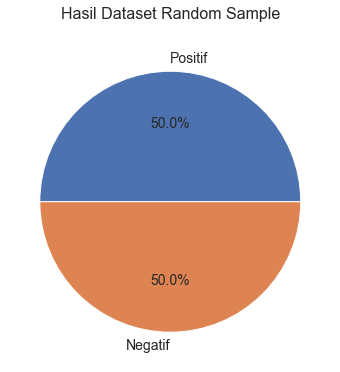

In [51]:
##Visualisasi Grafik Sentimen
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['labeling'].value_counts()]
labels = list(data['labeling'].value_counts().index)
explode = (0.1, 0, 0)

ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = None, textprops={'fontsize': 14})
ax.set_title('Hasil Dataset Random Sample', fontsize = 16, pad = 20)
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('Hasil Dataset RandomUnderSampling')

In [20]:
# data.drop(data[data.polarity < 0].index, inplace=True)
# data

In [45]:
##hapus 70 Rows
data.drop([6,2743,2723,7,2710],0,inplace=True)

In [22]:
# data.to_csv('isat_dataset.csv')

# Visualisasi

In [23]:
# # Export to csv file
data.to_csv('Indosat_label1500.csv')

In [24]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
mask = np.array(Image.open('D:/twitter.png'))
# Polarity == 0 negatif
train_s0 = data[data["polarity"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["tweet_clean"])
wordcloud = WordCloud(stopwords=stopwords, colormap="Reds", width=800, height=500, mask=mask,background_color="Black").generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig("wordcloud negatif1.png")
plt.show()

# Polarity == 1 positif
mask = np.array(Image.open('D:/twitter.png'))
train_s1 = data[data["polarity"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["tweet_clean"])
wordcloud = WordCloud(stopwords=stopwords, colormap="Blues", width=800, height=500, mask=mask,background_color="Black").generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig("wordcloud positif1.png")
plt.show()


In [25]:
# all_words = ' '.join([text for text in data['tweet_clean']]) 
# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
# plt.figure(figsize=(10,7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [26]:
# normal_words= ' '.join([text for text in data['tweet_clean'][data['polarity']==0]])
# wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
# plt.figure(figsize=(10,7))
# plt.imshow(wordcloud,interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [27]:
# #positif tweet

# negative_words= ' '.join([text for text in data['tweet_clean'][data['polarity']==1]])
# wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
# plt.figure(figsize=(10,7))
# plt.imshow(wordcloud,interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [28]:
# #collect hashtags

# def hashtag_extract(x):
#     hashtags=[]
#     for i in x: #loop over words contain in tweet
#         ht = re.findall(r"#(\w+)",i)
#         hashtags.append(ht)
#     return hashtags

In [29]:
# #extracting hashtags from negatif tweets
# ht_negatif = hashtag_extract(data['tweet_clean'][data['polarity']==0])
# #extracting hashtags from positif tweets
# ht_positif=hashtag_extract(data['tweet_clean'][data['polarity']==1])
# ht_negatif = sum(ht_negatif,[])
# ht_positif = sum(ht_positif,[])

In [30]:
# #non-racist tweets

# nonracist_tweets = nltk.FreqDist(ht_regular)
# df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

# #selecting top 20 most frequent hashtags
# df1 = df1.nlargest(columns="Count",n=20)
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=df1, x="Hashtag", y="Count")
# ax.set(ylabel = "Count")
# plt.show()

In [31]:
#BARPLOT 

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(Tweet, columnTweet, quantity):
    all_words = ' '.join([Tweet for Tweet in Tweet[columnTweet].astype('str')])
    token_phrase= token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                 "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette= 'deep')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

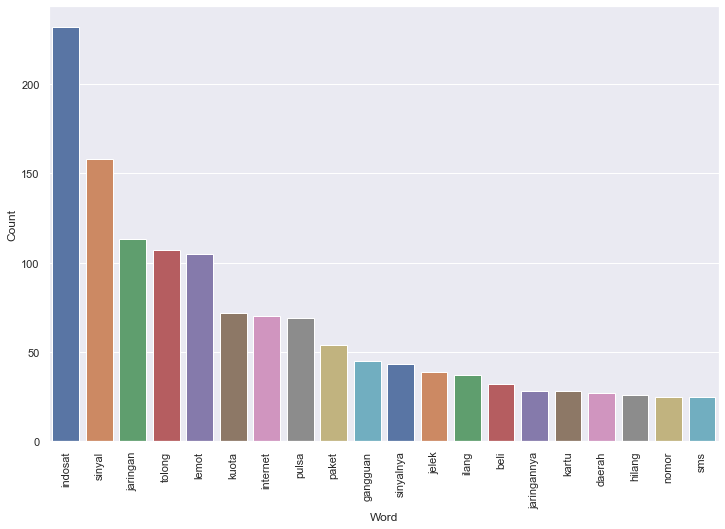

In [32]:
counter(data, "tweet_clean", 20)

In [33]:
# #Creating wordcloud for all tweets
# create_wordcloud(data["tweet_clean"].values)

In [34]:
# data = pd.read_csv('isat_dataset.csv')
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# data

In [46]:
#Menghapus kolom yang tidak dibutuhkan
data = data.drop(columns=['username', 'tweetcreatedts', 'tweet', 'text_clean', 'tokenizing', 'filtering', 'stemming', 'polarity_score'], axis=1, inplace=False)
data.head(10)

,tweet_clean,labeling,polarity
1,transfer pulsa nomor kirim kode pulsanya dibantu,Negatif,0
2,tolong internet indosat tibatiba lemot benerbe...,Negatif,0
9,kuota sinyalnya lemot,Negatif,0
13,drkmrn sinyalnya bener,Negatif,0
16,tolong trims,Negatif,0
18,terdaftar otomatis paket menit dikenakan tarif,Positif,1
22,jaringan sayaa semalem kenapaa adaa gangguan i...,Negatif,0
24,beli paket terkonfirmasi sisanya kemana,Positif,1
40,stop pulsa darurat ngerasa daftar gunain butuh...,Negatif,0
48,ngelatih sabar,Positif,1


In [36]:
# data.to_csv('isatlabeling.csv')

In [37]:
# data = pd.read_csv('labeling1000.csv')
# data

In [38]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [25]:
#Cek data NULL
data.isnull().sum()

tweet_clean    0
polarity       0
dtype: int64

In [47]:
#Ubah type int ke float
data['polarity'] = data['polarity'].astype(float)

In [42]:
# data = data.astype({'polarity' : 'category'})
# data = data.astype({'tweet_clean' : 'string'})
# data.dtypes

In [15]:
#cek type data
data.dtypes

tweet_clean     object
polarity       float64
dtype: object

In [48]:
#tampilkan jumlah data dan jenis label
print("Jumlah Data: ",len(data['tweet_clean']))
print("Jenis Label: ",np.unique(np.array(data['polarity'])))

Jumlah Data:  800
Jenis Label:  [0. 1.]


In [49]:
#balancing positive & negative data
s_1 = data[data['polarity']==0].sample(400,replace=True)
s_2 = data[data['polarity']==1].sample(400,replace=True)
data = pd.concat([s_1, s_2])

print(data.shape)
print(data['polarity'].value_counts(normalize=True))

(800, 3)
0.0    0.5
1.0    0.5
Name: polarity, dtype: float64


In [46]:
# s_1 = data[data['polarity']==0].sample(s_1, k=int(len(s_1)/2))
# s_2 = data[data['polarity']==1].sample(s_2, k=int(len(s_2)/2))
# data = pd.concat([s_1, s_2])

# print(data.shape)
# print(data['polarity'].value_counts(normalize=True))

In [47]:
# import random

# set_Positif = []
# set_Negatif = [] 

# for n in dataset:
#     if(n[1] == 'Positif'):
#         set_Positif.append(n)
  
#     else: 
#         set_Negatif.append(n)

# set_Positif = random.sample(set_Positif, k=int(len(set_Positif)/2))
# set_Negatif = random.sample(set_Negatif, k=int(len(set_Negatif)/2))

# train = set_Positif + set_Negatif

# train_set = []

# for n in train:
#      train_set.append(n)

In [50]:
#menghitung masing2 nilai
data['polarity'].value_counts()

0.0    400
1.0    400
Name: polarity, dtype: int64

In [23]:
#mengatur nilai X, y
X = data['tweet_clean']
y = data['polarity']

In [20]:
# Split data Training & Testing Set (with composition data train 70%, data test 30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=0 )
print("Dataset Training: ", len(X_train))
print("Dataset Testing: ", len(X_test))

Dataset Training:  560
Dataset Testing:  240


In [51]:
# data.isnull().sum()

In [52]:
# data[data["tweet_clean"].notnull()]

# Term Weighting Menggunakan TFIDF Dan CountVectorizer

In [21]:
#------------------------Term Weighting -CountVectorizer --------------------
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 
#Bag Of Words
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(data['tweet_clean']) # tokenize and build vocabulary
bow.shape

(800, 1019)

In [22]:
#------------------------Term Weighting -TF-IDF --------------------
#Proses training X_Train
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(560, 868)
(240, 868)


In [23]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (560, 868)
X_test_shape :  (240, 868)
y_train_shape :  (560,)
y_test_shape :  (240,)


In [24]:
def preprocess_data(data):
    # cleansing data
    data = cleaningText(text)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = remove_stopwords(words)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    return data

# Training & Testing Model pengujian dengan menggunakan MultinomialNB dengan K- Fold Cross Validation

In [25]:
#-------Pemodelan Naive Bayes pada Data Train
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
clf.fit(X_train,y_train)

scores = cross_val_score(clf, X_train, y_train, cv=10) #
print("Akurasi skor NB K-Fold Cross Validation:", scores)
print("Rata-rata akurasi: ", scores.mean())

Akurasi skor NB K-Fold Cross Validation: [0.94642857 0.96428571 0.89285714 0.92857143 0.89285714 0.875
 0.94642857 0.92857143 0.92857143 0.94642857]
Rata-rata akurasi:  0.925


In [26]:
#-------Evaluasi pada Data Test menggunakan confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix

predict = clf.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, predict))
print("precision score: ", precision_score(y_test, predict, average='macro'))
print("recall score: ", recall_score(y_test, predict,average='macro'))
print("f1 score: ", f1_score(y_test, predict, average='macro'))
print(f'confusion matrix:\n {confusion_matrix(y_test, predict)}')

accuracy score:  0.9333333333333333
precision score:  0.9420289855072463
recall score:  0.9322033898305084
f1 score:  0.932867132867133
confusion matrix:
 [[102  16]
 [  0 122]]


In [ ]:
#Visualisasi confusion matrix
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predict)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix Rasio 70:30')
plt.xlabel('Actual label')
plt.ylabel('Prediction label')
plt.savefig("confusion_matrix70x30(macro).png")
plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,predict, "binary"))

# Klasifikasi menggunakan Naive Bayes Classifier

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

In [ ]:
label = ['Positif', 'Negatif']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

# Optional Klasifikasi

In [ ]:
# #Penerapan Naive Bayes 
# from sklearn.naive_bayes import MultinomialNB

# clf = MultinomialNB().fit(X_train, y_train)
# predicted = clf.predict(X_test)
# print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))

In [ ]:
# #Penerapan Naive Bayes menggunakan TextBlob Bhasa inggris

# from textblob.classifiers import NaiveBayesClassifier
# cl = NaiveBayesClassifier(train)
# print('Akurasi Test:', cl.accuracy(dataset))

# Model Predict

In [ ]:
# #Predict sentiment on data test by using model has been created, and then visualize a confusion matrix


# predict = clf.predict(X_test)
# accuracy = accuracy_score(y_test, predict)
# print('Model Accuracy on Test Data:', accuracy)
# confusion_matrix(y_test, predict)

# fig, ax = plt.subplots(figsize = (8,6))
# sns.heatmap(confusion_matrix(y_true = y_test, predict = predict), fmt = 'g', annot = True)
# ax.xaxis.set_label_position('top')
# ax.xaxis.set_ticks_position('top')
# ax.set_xlabel('Prediction', fontsize = 14)
# ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
# ax.set_ylabel('Actual', fontsize = 14)
# ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
# plt.show()